# Gráfico de dispersión (Scatter plot)
La correlación va de -1 a 1, donde:
- 1 indica una correlación positiva perfecta
- -1 indica una correlación negativa perfecta
- 0 indica ninguna correlación

En este Notebook encontraremos primero la correlación perfecta que existe entre 'Astronomy' y 'Defense Against the Dark Arts', y luego buscaremos la siguiente pareja de características con mayor correlación en valor absoluto para entender qué parejas de asignaturas tienen similares patrones de puntuación.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Leer el Dataset

In [2]:
# Establecemos la ruta y leemos el archivo convirtiéndolo en un DataFrame
file_train = '../datasets/dataset_train.csv'
df_train = pd.read_csv(file_train, index_col=0)

### Eliminar las filas con datos incompletos

In [3]:
# El gráfico Scatter Plot requiere que todas las filas tengan datos completos
df_train = df_train.dropna()

### Asignaturas a estudiar

In [4]:
# Obtener lista de columnas de cursos (excluyendo columnas que no son cursos)
courses = df_train.select_dtypes(include=['float64']).columns
print("Asignaturas disponibles:")
print(courses)

Asignaturas disponibles:
Index(['Arithmancy', 'Astronomy', 'Herbology', 'Defense Against the Dark Arts',
       'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic',
       'Transfiguration', 'Potions', 'Care of Magical Creatures', 'Charms',
       'Flying'],
      dtype='object')


### 1. Visualización de la correlación perfecta

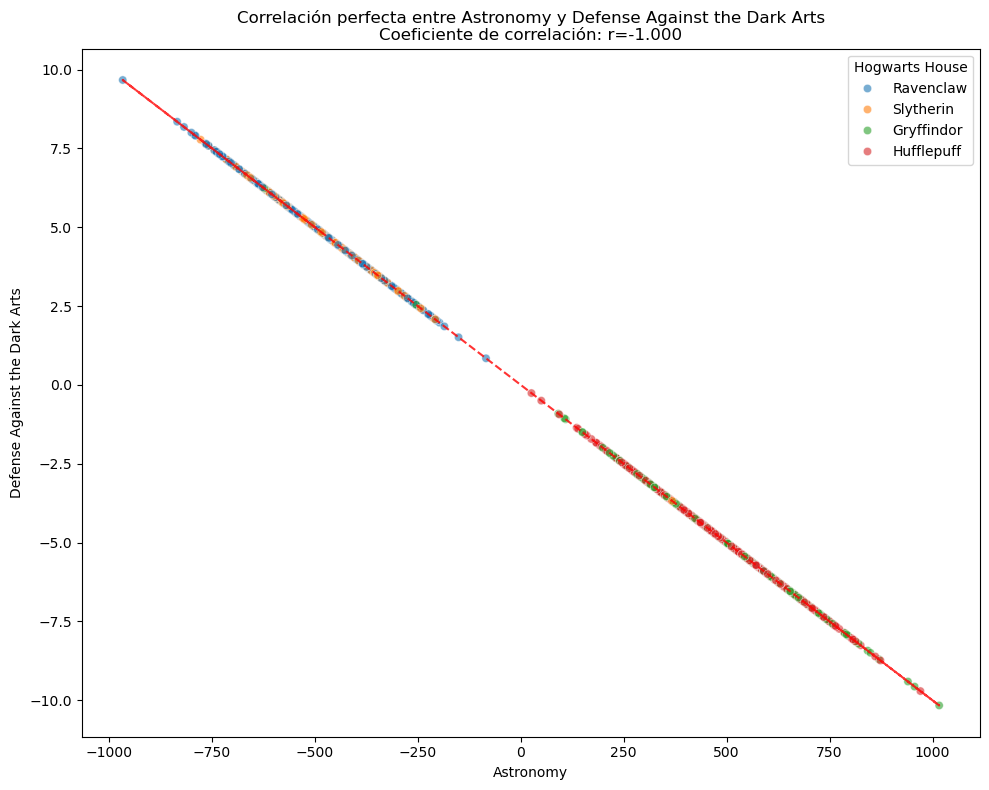

In [5]:
# Crear scatter plot para la correlación perfecta
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_train, x='Astronomy', y='Defense Against the Dark Arts', 
                hue='Hogwarts House', alpha=0.6)

# Añadir línea de tendencia
z = np.polyfit(df_train['Astronomy'], df_train['Defense Against the Dark Arts'], 1)
p = np.poly1d(z)
plt.plot(df_train['Astronomy'], p(df_train['Astronomy']), "r--", alpha=0.8)

# Añadir coeficiente de correlación al título
plt.title('Correlación perfecta entre Astronomy y Defense Against the Dark Arts\n' +
          'Coeficiente de correlación: r=-1.000')
plt.xlabel('Astronomy')
plt.ylabel('Defense Against the Dark Arts')

plt.tight_layout()
plt.savefig('../output/perfect_correlation_plot.png')
plt.show()
plt.close()

### 2. Búsqueda de la siguiente correlación más fuerte

In [6]:
# Calcular matriz de correlación
correlation_matrix = df_train[courses].corr()

# Obtener triángulo superior de la matriz de correlación
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Encontrar las dos características con mayor correlación en valor absoluto
# (excluyendo la correlación perfecta ya conocida)
upper_tri_abs = np.abs(upper_tri)
upper_tri_abs.loc['Astronomy', 'Defense Against the Dark Arts'] = 0  # Excluir correlación perfecta

max_corr_abs = upper_tri_abs.max().max()
feature1, feature2 = np.where(upper_tri_abs == max_corr_abs)
feature1, feature2 = courses[feature1[0]], courses[feature2[0]]

# Obtener el valor original de la correlación
max_corr = upper_tri.loc[feature1, feature2]
print(f"\nSegunda correlación más fuerte (en valor absoluto): {max_corr:.3f}")
print(f"Entre las materias: '{feature1}' y '{feature2}'")


Segunda correlación más fuerte (en valor absoluto): -0.897
Entre las materias: 'History of Magic' y 'Flying'


### 3. Visualización de la segunda correlación más fuerte

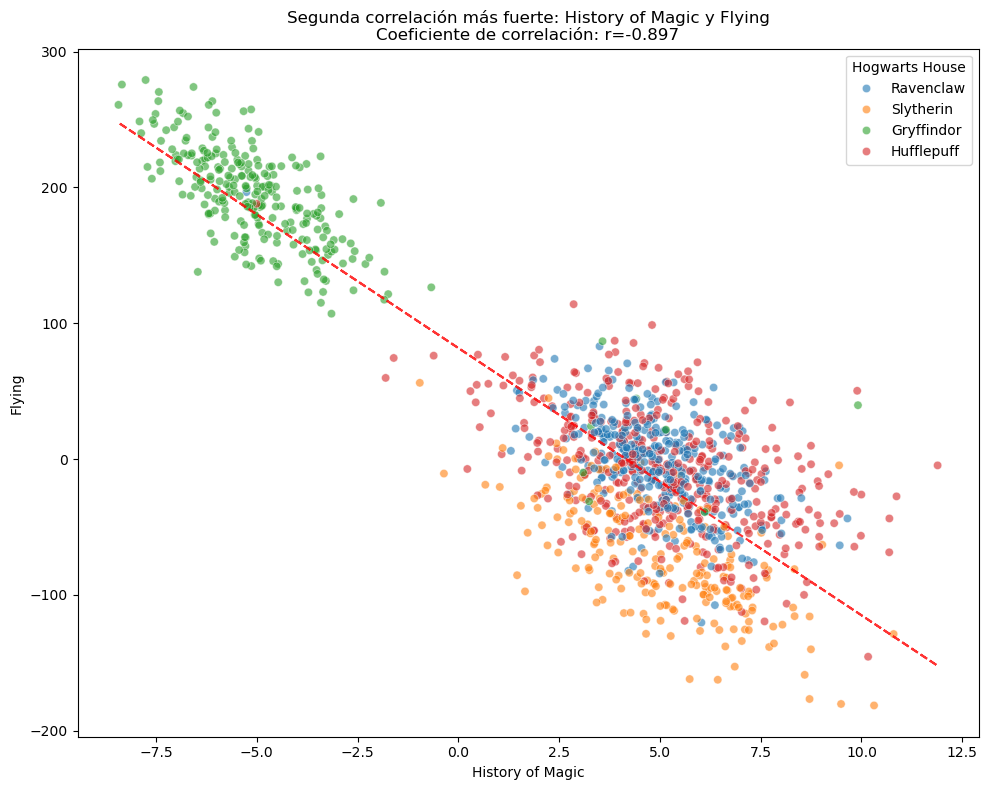

In [7]:
# Crear scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_train, x=feature1, y=feature2, hue='Hogwarts House', alpha=0.6)

# Añadir línea de tendencia
z = np.polyfit(df_train[feature1], df_train[feature2], 1)
p = np.poly1d(z)
plt.plot(df_train[feature1], p(df_train[feature1]), "r--", alpha=0.8)

# Añadir coeficiente de correlación al título
plt.title(f'Segunda correlación más fuerte: {feature1} y {feature2}\n' +
          f'Coeficiente de correlación: r={max_corr:.3f}')
plt.xlabel(feature1)
plt.ylabel(feature2)

plt.tight_layout()
plt.savefig('../output/second_strongest_correlation_plot.png')
plt.show()
plt.close()

## Respuesta a la pregunta central

In [8]:
print("\nQuestion: What are the two features that are similar?\n")
print("Las dos parejas de características más similares son:")
print(f"1. 'Astronomy' y 'Defense Against the Dark Arts' (correlación perfecta negativa, r=-1.000)")
print(f"2. '{feature1}' y '{feature2}' (correlación: r={max_corr:.3f})")


Question: What are the two features that are similar?

Las dos parejas de características más similares son:
1. 'Astronomy' y 'Defense Against the Dark Arts' (correlación perfecta negativa, r=-1.000)
2. 'History of Magic' y 'Flying' (correlación: r=-0.897)
